In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
df = pd.read_csv('brasil_forest_fires.csv')
df.head(5)

,year,state,month,number,date
0,1998,AC,JAN,0,1998-01-01
1,1999,AC,JAN,0,1999-01-01
2,2000,AC,JAN,0,2000-01-01
3,2001,AC,JAN,0,2001-01-01
4,2002,AC,JAN,0,2002-01-01


In [15]:
df.dtypes

year       int64
state     object
month     object
number     int64
date      object
dtype: object

In [26]:
df['date'] = pd.DatetimeIndex(df['date'])
df.dtypes

year               int64
state             object
month             object
number             int64
date      datetime64[ns]
dtype: object

In [40]:
#definindo o estado a ser usado
estado = 'RJ'

In [37]:
df_estado = df[df['state'] == estado]

In [38]:
df_estado = df_estado.rename(columns={'date': 'ds', 'number': 'y'})
df_estado = df_estado.drop(columns={'year' , 'state', 'month'})
df_estado.head(5)

,y,ds
414,0,1998-01-01
415,0,1999-01-01
416,0,2000-01-01
417,0,2001-01-01
418,0,2002-01-01


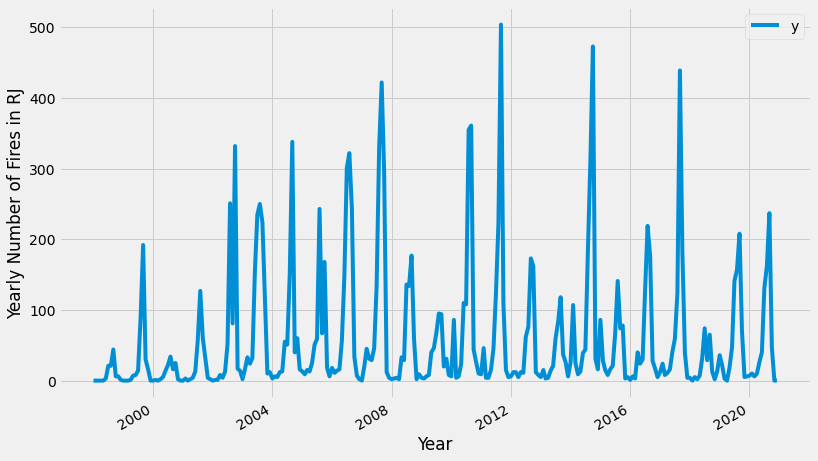

In [39]:
ax = df_estado.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Yearly Number of Fires in '+ estado )
ax.set_xlabel('Year')

plt.show()

In [41]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [42]:
my_model.fit(df_estado)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
307,2023-08-01
308,2023-09-01
309,2023-10-01
310,2023-11-01
311,2023-12-01


In [44]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
307,2023-08-01,164.347991,37.918302,281.162788
308,2023-09-01,199.398381,67.217386,323.419788
309,2023-10-01,101.425351,-21.590275,226.680129
310,2023-11-01,6.442787,-118.108952,129.481125
311,2023-12-01,1.557362,-118.221462,122.731182


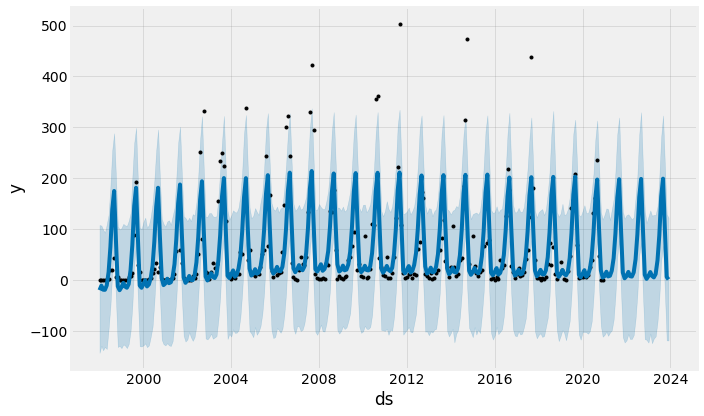

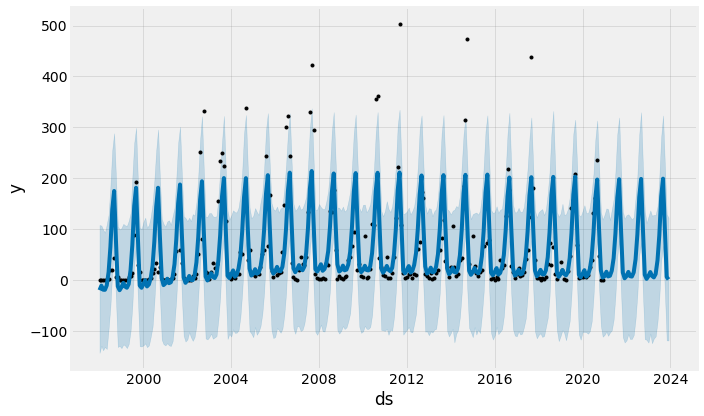

In [45]:
my_model.plot(forecast, uncertainty=True)

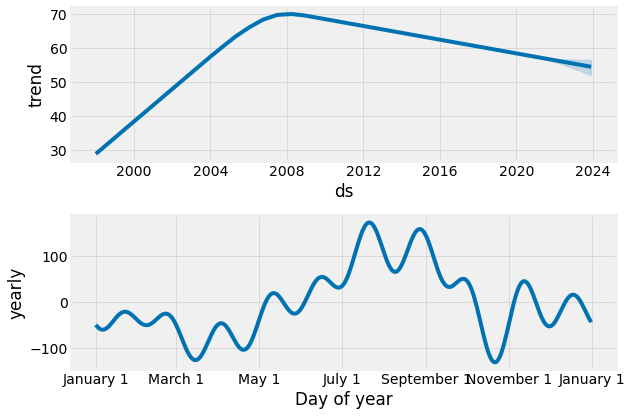

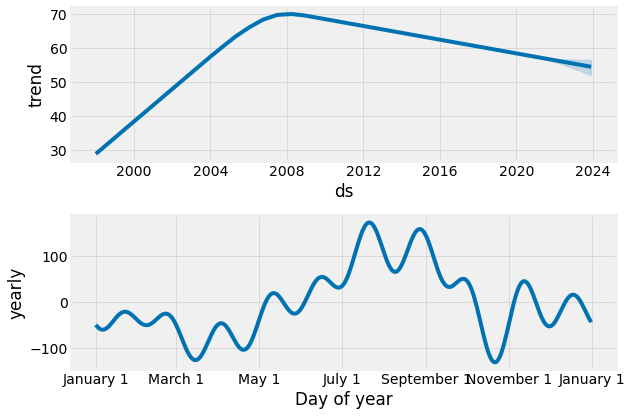

In [46]:
my_model.plot_components(forecast)